In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import ipyleaflet
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd
import dask
from dask.distributed import Client as daskClient

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
import xgboost as xgb

# Machine Learning
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Planetary Computer Tools
import pystac
import pystac_client
import odc
from pystac_client import Client
from pystac.extensions.eo import EOExtension as eo
from odc.stac import stac_load
import planetary_computer as pc
pc.settings.set_subscription_key('df2f4d7a411942f8a5b81d60cb9b95ca')

# Others
import requests
import rich.table
import math
import random
from itertools import cycle
from tqdm import tqdm
from time import sleep
tqdm.pandas()

In [2]:
# Getting data from CSV file
crop_presence_data = pd.read_csv("crop.csv")
crop_presence_data.head()

,Latitude and Longitude,Class of Land
0,"(10.323727047081501, 105.2516346045924)",Rice
1,"(10.322364360592521, 105.27843410554115)",Rice
2,"(10.321455902933202, 105.25254306225168)",Rice
3,"(10.324181275911162, 105.25118037576274)",Rice
4,"(10.324635504740822, 105.27389181724476)",Rice


# Data collection

In [3]:
#vegetative
indices_vegetative=pd.read_csv("vegetative.csv")
ndvi_vegetative=indices_vegetative[['NDVI']]
ndvi_vegetative.columns =['NDVI_veg']

evi_vegetative=indices_vegetative[['EVI']]
evi_vegetative.columns =['EVI_veg']

rgvi_vegetative=indices_vegetative[['RGVI']]
rgvi_vegetative.columns =['RGVI_veg']

ndbi_vegetative = indices_vegetative[['NDBI']]
ndbi_vegetative.columns = ['NDBI_veg']

dvi_vegetative = indices_vegetative[['DVI']]
dvi_vegetative.columns = ['DVI_veg']

ipvi_vegetative = indices_vegetative[['IPVI']]
ipvi_vegetative.columns = ['IPVI_veg']

msavi_vegetative = indices_vegetative[['MSAVI']]
msavi_vegetative.columns = ['MSAVI_veg']

ndwi_vegetative = indices_vegetative[['NDWI']]
ndwi_vegetative.columns = ['NDWI_veg']


#vegetative_2
indices_vegetative_2=pd.read_csv("vegetative_2.csv")
ndvi_vegetative_2=indices_vegetative_2[['NDVI']]
ndvi_vegetative_2.columns =['NDVI_veg2']

evi_vegetative_2=indices_vegetative_2[['EVI']]
evi_vegetative_2.columns =['EVI_veg2']

rgvi_vegetative_2=indices_vegetative_2[['RGVI']]
rgvi_vegetative_2.columns =['RGVI_veg2']

ndbi_vegetative_2 = indices_vegetative_2[['NDBI']]
ndbi_vegetative_2.columns = ['NDBI_veg2']

dvi_vegetative_2 = indices_vegetative_2[['DVI']]
dvi_vegetative_2.columns = ['DVI_veg2']

ipvi_vegetative_2 = indices_vegetative_2[['IPVI']]
ipvi_vegetative_2.columns = ['IPVI_veg2']

msavi_vegetative_2 = indices_vegetative_2[['MSAVI']]
msavi_vegetative_2.columns = ['MSAVI_veg2']

ndwi_vegetative_2 = indices_vegetative_2[['NDWI']]
ndwi_vegetative_2.columns = ['NDWI_veg2']


In [4]:
#reproductive
indices_reproductive=pd.read_csv("reproductive.csv")
ndvi_reproductive=indices_reproductive[['NDVI']]
ndvi_reproductive.columns =['NDVI_rep']

evi_reproductive=indices_reproductive[['EVI']]
evi_reproductive.columns =['EVI_rep']

rgvi_reproductive=indices_reproductive[['RGVI']]
rgvi_reproductive.columns =['RGVI_rep']

ndbi_reproductive = indices_vegetative[['NDBI']]
ndbi_reproductive.columns = ['NDBI_rep']

dvi_reproductive = indices_vegetative[['DVI']]
dvi_reproductive.columns = ['DVI_rep']

ipvi_reproductive = indices_vegetative[['IPVI']]
ipvi_reproductive.columns = ['IPVI_rep']

msavi_reproductive = indices_vegetative[['MSAVI']]
msavi_reproductive.columns = ['MSAVI_rep']

ndwi_reproductive = indices_vegetative[['NDWI']]
ndwi_reproductive.columns = ['NDWI_rep']

# reproductive_2
indices_reproductive_2=pd.read_csv("reproductive_2.csv")
ndvi_reproductive_2=indices_reproductive_2[['NDVI']]
ndvi_reproductive_2.columns =['NDVI_rep2']

evi_reproductive_2=indices_reproductive_2[['EVI']]
evi_reproductive_2.columns =['EVI_rep2']

rgvi_reproductive_2=indices_reproductive_2[['RGVI']]
rgvi_reproductive_2.columns =['RGVI_rep2']

ndbi_reproductive_2 = indices_vegetative[['NDBI']]
ndbi_reproductive_2.columns = ['NDBI_rep2']

dvi_reproductive_2 = indices_vegetative[['DVI']]
dvi_reproductive_2.columns = ['DVI_rep2']

ipvi_reproductive_2 = indices_vegetative[['IPVI']]
ipvi_reproductive_2.columns = ['IPVI_rep2']

msavi_reproductive_2 = indices_vegetative[['MSAVI']]
msavi_reproductive_2.columns = ['MSAVI_rep2']

ndwi_reproductive_2 = indices_vegetative[['NDWI']]
ndwi_reproductive_2.columns = ['NDWI_rep2']



In [5]:
# ripening
indices_ripening = pd.read_csv("ripening.csv")
ndvi_ripening = indices_ripening[['NDVI']]
ndvi_ripening.columns = ['NDVI_rip']

evi_ripening = indices_ripening[['EVI']]
evi_ripening.columns = ['EVI_rip']

rgvi_ripening = indices_ripening[['RGVI']]
rgvi_ripening.columns = ['RGVI_rip']

ndbi_ripening = indices_vegetative[['NDBI']]
ndbi_ripening.columns = ['NDBI_rip']

dvi_ripening = indices_vegetative[['DVI']]
dvi_ripening.columns = ['DVI_rip']

ipvi_ripening = indices_vegetative[['IPVI']]
ipvi_ripening.columns = ['IPVI_rip']

msavi_ripening = indices_vegetative[['MSAVI']]
msavi_ripening.columns = ['MSAVI_rip']

ndwi_ripening = indices_vegetative[['NDWI']]
ndwi_ripening.columns = ['NDWI_rip']

# ripening_2
indices_ripening_2 = pd.read_csv("ripening_2.csv")
ndvi_ripening_2 = indices_ripening_2[['NDVI']]
ndvi_ripening_2.columns = ['NDVI_rip2']

evi_ripening_2 = indices_ripening_2[['EVI']]
evi_ripening_2.columns = ['EVI_rip2']

rgvi_ripening_2 = indices_ripening_2[['RGVI']]
rgvi_ripening_2.columns = ['RGVI_rip2']

ndbi_ripening_2 = indices_vegetative_2[['NDBI']]
ndbi_ripening_2.columns = ['NDBI_rip2']

dvi_ripening_2 = indices_vegetative_2[['DVI']]
dvi_ripening_2.columns = ['DVI_rip2']

ipvi_ripening_2 = indices_vegetative_2[['IPVI']]
ipvi_ripening_2.columns = ['IPVI_rip2']

msavi_ripening_2 = indices_vegetative_2[['MSAVI']]
msavi_ripening_2.columns = ['MSAVI_rip2']

ndwi_ripening_2 = indices_ripening_2[['NDWI']]
ndwi_ripening_2.columns = ['NDWI_rip2']


In [6]:
#concating all the indices into a single DataFrame
crop_data=pd.concat([ndvi_vegetative,evi_vegetative,rgvi_vegetative,ndbi_vegetative, dvi_vegetative, ipvi_vegetative, msavi_vegetative, ndwi_vegetative, ndvi_vegetative_2,evi_vegetative_2,rgvi_vegetative_2,ndbi_vegetative_2, dvi_vegetative_2, ipvi_vegetative_2, msavi_vegetative_2, ndwi_vegetative_2,ndvi_reproductive,evi_reproductive,rgvi_reproductive,ndbi_reproductive, dvi_reproductive, ipvi_reproductive, msavi_reproductive, ndwi_reproductive,ndvi_reproductive_2,evi_reproductive_2,rgvi_reproductive_2,ndbi_reproductive_2, dvi_reproductive_2, ipvi_reproductive_2, msavi_reproductive_2, ndwi_reproductive_2,ndvi_ripening,evi_ripening,rgvi_ripening,ndbi_ripening, dvi_ripening, ipvi_ripening, msavi_ripening, ndwi_ripening,ndvi_ripening_2,evi_ripening_2,rgvi_ripening_2,ndbi_ripening_2, dvi_ripening_2, ipvi_ripening_2, msavi_ripening_2, ndwi_ripening_2],axis=1) 

In [7]:
crop_data=pd.concat([crop_data,crop_presence_data['Class of Land']],axis=1)

In [8]:
crop_data.to_csv("indices.csv")

In [9]:
crop_data

,NDVI_veg,EVI_veg,RGVI_veg,NDBI_veg,DVI_veg,IPVI_veg,MSAVI_veg,NDWI_veg,NDVI_veg2,EVI_veg2,...,NDWI_rip,NDVI_rip2,EVI_rip2,RGVI_rip2,NDBI_rip2,DVI_rip2,IPVI_rip2,MSAVI_rip2,NDWI_rip2,Class of Land
0,0.422074,0.118437,1.068070,-0.140804,525.595960,0.647893,0.699580,0.699580,0.167972,0.033225,...,0.699580,0.092286,0.003993,1.028753,-0.199213,387.070707,0.579675,0.620732,0.517459,Rice
1,0.360787,0.102294,1.089308,-0.322961,676.000000,0.630994,0.700635,0.700635,0.378719,0.080842,...,0.700635,0.070908,0.004759,1.026593,-0.233825,798.232323,0.739109,0.664017,0.522658,Rice
2,0.370390,0.102235,1.078377,-0.159285,420.969697,0.623016,0.680218,0.680218,0.203749,0.042147,...,0.680218,0.226936,0.005013,1.016627,-0.123399,422.191919,0.596699,0.651263,0.518498,Rice
3,0.421787,0.127217,1.077879,-0.195307,532.780303,0.625428,0.693529,0.693529,0.146944,0.027215,...,0.693529,0.093788,0.001896,1.053283,-0.217245,250.856061,0.570293,0.599636,0.508575,Rice
4,0.234421,0.054358,1.119928,-0.228668,243.386364,0.602747,0.642504,0.642504,0.206149,0.067763,...,0.642504,0.130103,0.007449,1.038440,-0.196054,998.113636,0.666157,0.652044,0.530362,Rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.805688,0.335743,1.006032,-0.336282,1468.424242,0.908002,0.821733,0.821733,0.488007,0.019097,...,0.821733,0.428861,0.072752,1.007580,-0.229370,305.393939,0.744004,0.545553,0.672730,Non Rice
596,0.772876,0.299192,1.012224,-0.276114,1375.303030,0.881113,0.814351,0.814351,0.559802,0.025692,...,0.814351,0.428185,0.070864,0.997849,-0.247616,342.916667,0.779901,0.549850,0.673628,Non Rice
597,0.763383,0.291757,1.013963,-0.284230,1301.181818,0.881704,0.812914,0.812914,0.549541,0.024948,...,0.812914,0.448632,0.074878,0.989211,-0.252437,327.737374,0.774771,0.549260,0.679586,Non Rice
598,0.830266,0.371834,1.006261,-0.383916,1579.742424,0.919756,0.827403,0.827403,0.582559,0.027712,...,0.827403,0.476421,0.084578,0.993613,-0.290682,348.590909,0.791279,0.551130,0.685898,Non Rice


# Filling Null Values
During the filtering process, water locations were completely masked out resulting in null values of indices.
Hence adding back the index values of water for respective indices \
NDVI=-1 \
RGVI=0

In [10]:
crop_data.isnull().sum()

NDVI_veg         100
EVI_veg            0
RGVI_veg         100
NDBI_veg         100
DVI_veg            0
IPVI_veg         100
MSAVI_veg          0
NDWI_veg           0
NDVI_veg2        100
EVI_veg2           0
RGVI_veg2        100
NDBI_veg2        100
DVI_veg2           0
IPVI_veg2        100
MSAVI_veg2         0
NDWI_veg2          0
NDVI_rep          99
EVI_rep            0
RGVI_rep          99
NDBI_rep         100
DVI_rep            0
IPVI_rep         100
MSAVI_rep          0
NDWI_rep           0
NDVI_rep2        100
EVI_rep2           0
RGVI_rep2        100
NDBI_rep2        100
DVI_rep2           0
IPVI_rep2        100
MSAVI_rep2         0
NDWI_rep2          0
NDVI_rip          99
EVI_rip            0
RGVI_rip          99
NDBI_rip         100
DVI_rip            0
IPVI_rip         100
MSAVI_rip          0
NDWI_rip           0
NDVI_rip2        120
EVI_rip2           0
RGVI_rip2        120
NDBI_rip2        100
DVI_rip2           0
IPVI_rip2        100
MSAVI_rip2         0
NDWI_rip2    

In [11]:
#nvdi null values
crop_data[['NDVI_veg','NDVI_veg2','NDVI_rep','NDVI_rep2','NDVI_rip','NDVI_rip2']]=crop_data[['NDVI_veg','NDVI_veg2','NDVI_rep','NDVI_rep2','NDVI_rip','NDVI_rip2']].fillna(-1)

In [12]:
#rgvi null values
crop_data[['RGVI_veg','RGVI_veg2','RGVI_rep','RGVI_rep2','RGVI_rip','RGVI_rip2']]=crop_data[['RGVI_veg','RGVI_veg2','RGVI_rep','RGVI_rep2','RGVI_rip','RGVI_rip2']].fillna(0)

In [13]:
#ipvi null values
crop_data[['IPVI_veg', 'IPVI_veg2', 'IPVI_rep', 'IPVI_rep2', 'IPVI_rip', 'IPVI_rip2']]=crop_data[['IPVI_veg', 'IPVI_veg2', 'IPVI_rep', 'IPVI_rep2', 'IPVI_rip', 'IPVI_rip2']] = crop_data[['RGVI_veg', 'RGVI_veg2', 'RGVI_rep', 'RGVI_rep2', 'RGVI_rip', 'RGVI_rip2']].fillna(0)


In [14]:
#NDBI null values
crop_data[['NDBI_veg', 'NDBI_veg2', 'NDBI_rep', 'NDBI_rep2', 'NDBI_rip', 'NDBI_rip2']]=crop_data[['NDBI_veg', 'NDBI_veg2', 'NDBI_rep', 'NDBI_rep2', 'NDBI_rip', 'NDBI_rip2']].fillna(-0.5)

# Model Training

In [15]:
X = crop_data.drop(columns=['Class of Land'])
y = crop_data['Class of Land'].values
y = np.where(y == 'Rice', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=40)

In [16]:
#FEATURE SCALING
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#Function for confusion matrix
def plot_confusion_matrix(true_value,predicted_value,title,labels):
    '''
    Plots a confusion matrix.
    Attributes:
    true_value - The ground truth value for comparision.
    predicted_value - The values predicted by the model.
    title - Title of the plot.
    labels - The x and y labels of the plot.
    '''
    cm = confusion_matrix(true_value,predicted_value)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);
    

# Logistic Regression

In [18]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))

Accuracy 98.89%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.99      0.99      0.99        90

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



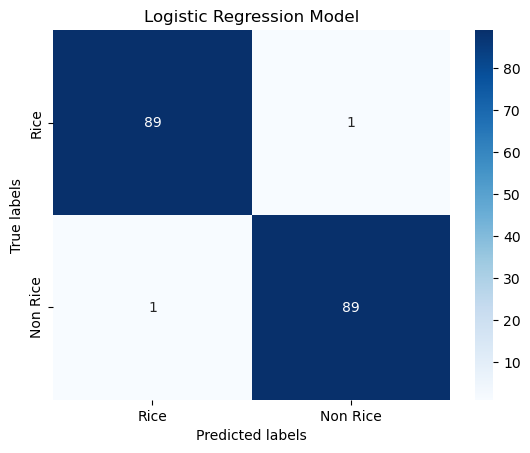

In [21]:
plot_confusion_matrix(y_test, y_pred,"Logistic Regression Model",['Rice', 'Non Rice'])

# KNN model

In [22]:
model_2=KNeighborsClassifier(n_neighbors=5)
model_2.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred2=model_2.predict(X_test)

In [24]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        90

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



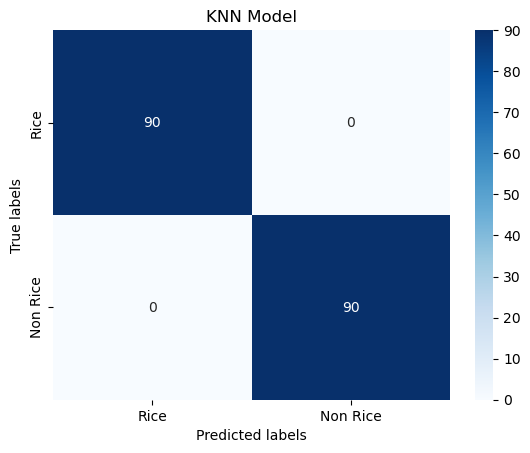

In [25]:
plot_confusion_matrix(y_test, y_pred2,"KNN Model",['Rice', 'Non Rice'])

# XGBOOST

In [32]:
#Hyperparater Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [33]:
model_3 = xgb.XGBClassifier()

In [34]:
grid_search = GridSearchCV(estimator=model_3, param_grid=params, scoring='f1',n_jobs=-1,cv=5,verbose=1)


In [35]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='f1', verbose=1)

In [37]:
best_params = grid_search.best_params_

In [38]:
best_model = grid_search.best_estimator_

In [39]:
best_params

{'colsample_bytree': 0.3,
 'gamma': 0.4,
 'learning_rate': 0.3,
 'max_depth': 3,
 'min_child_weight': 1}

In [40]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
y_pred4=best_model.predict(X_test)

In [42]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy 98.89%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.99      0.99      0.99        90

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



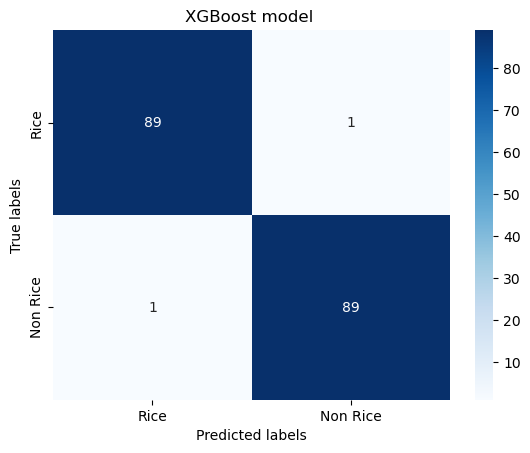

In [43]:
plot_confusion_matrix(y_test, y_pred4,"XGBoost model ",['Rice', 'Non Rice'])

 # SUBMISSION 

In [44]:
# Showing submission file
submission_data = pd.read_csv("submission.csv")
submission_data

,Latitude and Longitude
0,"(10.18019073690894, 105.32022315786804)"
1,"(10.561107033461816, 105.12772097986661)"
2,"(10.623790611954897, 105.13771401411867)"
3,"(10.583364246115156, 105.23946127195805)"
4,"(10.20744446668854, 105.26844107128906)"
...,...
245,"(10.308283266873062, 105.50872812216863)"
246,"(10.582910017285496, 105.23991550078767)"
247,"(10.581547330796518, 105.23991550078767)"
248,"(10.629241357910818, 105.15315779432643)"


In [45]:
#vegetative
indices_vegetative=pd.read_csv("vegetative_test.csv")
ndvi_vegetative=indices_vegetative[['NDVI']]
ndvi_vegetative.columns =['NDVI_veg']

evi_vegetative=indices_vegetative[['EVI']]
evi_vegetative.columns =['EVI_veg']

rgvi_vegetative=indices_vegetative[['RGVI']]
rgvi_vegetative.columns =['RGVI_veg']

ndbi_vegetative = indices_vegetative[['NDBI']]
ndbi_vegetative.columns = ['NDBI_veg']

dvi_vegetative = indices_vegetative[['DVI']]
dvi_vegetative.columns = ['DVI_veg']

ipvi_vegetative = indices_vegetative[['IPVI']]
ipvi_vegetative.columns = ['IPVI_veg']

msavi_vegetative = indices_vegetative[['MSAVI']]
msavi_vegetative.columns = ['MSAVI_veg']

ndwi_vegetative = indices_vegetative[['NDWI']]
ndwi_vegetative.columns = ['NDWI_veg']


#vegetative_2
indices_vegetative_2=pd.read_csv("vegetative_2_test.csv")
ndvi_vegetative_2=indices_vegetative_2[['NDVI']]
ndvi_vegetative_2.columns =['NDVI_veg2']

evi_vegetative_2=indices_vegetative_2[['EVI']]
evi_vegetative_2.columns =['EVI_veg2']

rgvi_vegetative_2=indices_vegetative_2[['RGVI']]
rgvi_vegetative_2.columns =['RGVI_veg2']

ndbi_vegetative_2 = indices_vegetative_2[['NDBI']]
ndbi_vegetative_2.columns = ['NDBI_veg2']

dvi_vegetative_2 = indices_vegetative_2[['DVI']]
dvi_vegetative_2.columns = ['DVI_veg2']

ipvi_vegetative_2 = indices_vegetative_2[['IPVI']]
ipvi_vegetative_2.columns = ['IPVI_veg2']

msavi_vegetative_2 = indices_vegetative_2[['MSAVI']]
msavi_vegetative_2.columns = ['MSAVI_veg2']

ndwi_vegetative_2 = indices_vegetative_2[['NDWI']]
ndwi_vegetative_2.columns = ['NDWI_veg2']


In [46]:
#reproductive
indices_reproductive=pd.read_csv("reproductive_test.csv")
ndvi_reproductive=indices_reproductive[['NDVI']]
ndvi_reproductive.columns =['NDVI_rep']

evi_reproductive=indices_reproductive[['EVI']]
evi_reproductive.columns =['EVI_rep']

rgvi_reproductive=indices_reproductive[['RGVI']]
rgvi_reproductive.columns =['RGVI_rep']

ndbi_reproductive = indices_vegetative[['NDBI']]
ndbi_reproductive.columns = ['NDBI_rep']

dvi_reproductive = indices_vegetative[['DVI']]
dvi_reproductive.columns = ['DVI_rep']

ipvi_reproductive = indices_vegetative[['IPVI']]
ipvi_reproductive.columns = ['IPVI_rep']

msavi_reproductive = indices_vegetative[['MSAVI']]
msavi_reproductive.columns = ['MSAVI_rep']

ndwi_reproductive = indices_vegetative[['NDWI']]
ndwi_reproductive.columns = ['NDWI_rep']

# reproductive_2
indices_reproductive_2=pd.read_csv("reproductive_2_test.csv")
ndvi_reproductive_2=indices_reproductive_2[['NDVI']]
ndvi_reproductive_2.columns =['NDVI_rep2']

evi_reproductive_2=indices_reproductive_2[['EVI']]
evi_reproductive_2.columns =['EVI_rep2']

rgvi_reproductive_2=indices_reproductive_2[['RGVI']]
rgvi_reproductive_2.columns =['RGVI_rep2']

ndbi_reproductive_2 = indices_vegetative[['NDBI']]
ndbi_reproductive_2.columns = ['NDBI_rep2']

dvi_reproductive_2 = indices_vegetative[['DVI']]
dvi_reproductive_2.columns = ['DVI_rep2']

ipvi_reproductive_2 = indices_vegetative[['IPVI']]
ipvi_reproductive_2.columns = ['IPVI_rep2']

msavi_reproductive_2 = indices_vegetative[['MSAVI']]
msavi_reproductive_2.columns = ['MSAVI_rep2']

ndwi_reproductive_2 = indices_vegetative[['NDWI']]
ndwi_reproductive_2.columns = ['NDWI_rep2']



In [47]:
# ripening
indices_ripening = pd.read_csv("ripening_test.csv")
ndvi_ripening = indices_ripening[['NDVI']]
ndvi_ripening.columns = ['NDVI_rip']

evi_ripening = indices_ripening[['EVI']]
evi_ripening.columns = ['EVI_rip']

rgvi_ripening = indices_ripening[['RGVI']]
rgvi_ripening.columns = ['RGVI_rip']

ndbi_ripening = indices_vegetative[['NDBI']]
ndbi_ripening.columns = ['NDBI_rip']

dvi_ripening = indices_vegetative[['DVI']]
dvi_ripening.columns = ['DVI_rip']

ipvi_ripening = indices_vegetative[['IPVI']]
ipvi_ripening.columns = ['IPVI_rip']

msavi_ripening = indices_vegetative[['MSAVI']]
msavi_ripening.columns = ['MSAVI_rip']

ndwi_ripening = indices_vegetative[['NDWI']]
ndwi_ripening.columns = ['NDWI_rip']

# ripening_2
indices_ripening_2 = pd.read_csv("ripening_2_test.csv")
ndvi_ripening_2 = indices_ripening_2[['NDVI']]
ndvi_ripening_2.columns = ['NDVI_rip2']

evi_ripening_2 = indices_ripening_2[['EVI']]
evi_ripening_2.columns = ['EVI_rip2']

rgvi_ripening_2 = indices_ripening_2[['RGVI']]
rgvi_ripening_2.columns = ['RGVI_rip2']

ndbi_ripening_2 = indices_vegetative_2[['NDBI']]
ndbi_ripening_2.columns = ['NDBI_rip2']

dvi_ripening_2 = indices_vegetative_2[['DVI']]
dvi_ripening_2.columns = ['DVI_rip2']

ipvi_ripening_2 = indices_vegetative_2[['IPVI']]
ipvi_ripening_2.columns = ['IPVI_rip2']

msavi_ripening_2 = indices_vegetative_2[['MSAVI']]
msavi_ripening_2.columns = ['MSAVI_rip2']

ndwi_ripening_2 = indices_ripening_2[['NDWI']]
ndwi_ripening_2.columns = ['NDWI_rip2']


In [48]:
crop_data=pd.concat([ndvi_vegetative,evi_vegetative,rgvi_vegetative,ndbi_vegetative, dvi_vegetative, ipvi_vegetative, msavi_vegetative, ndwi_vegetative, ndvi_vegetative_2,evi_vegetative_2,rgvi_vegetative_2,ndbi_vegetative_2, dvi_vegetative_2, ipvi_vegetative_2, msavi_vegetative_2, ndwi_vegetative_2,ndvi_reproductive,evi_reproductive,rgvi_reproductive,ndbi_reproductive, dvi_reproductive, ipvi_reproductive, msavi_reproductive, ndwi_reproductive,ndvi_reproductive_2,evi_reproductive_2,rgvi_reproductive_2,ndbi_reproductive_2, dvi_reproductive_2, ipvi_reproductive_2, msavi_reproductive_2, ndwi_reproductive_2,ndvi_ripening,evi_ripening,rgvi_ripening,ndbi_ripening, dvi_ripening, ipvi_ripening, msavi_ripening, ndwi_ripening,ndvi_ripening_2,evi_ripening_2,rgvi_ripening_2,ndbi_ripening_2, dvi_ripening_2, ipvi_ripening_2, msavi_ripening_2, ndwi_ripening_2],axis=1) 

In [49]:
crop_data

,NDVI_veg,EVI_veg,RGVI_veg,NDBI_veg,DVI_veg,IPVI_veg,MSAVI_veg,NDWI_veg,NDVI_veg2,EVI_veg2,...,MSAVI_rip,NDWI_rip,NDVI_rip2,EVI_rip2,RGVI_rip2,NDBI_rip2,DVI_rip2,IPVI_rip2,MSAVI_rip2,NDWI_rip2
0,0.046298,0.009429,1.281762,-0.519289,137.931818,0.571065,0.530326,0.530326,0.291337,0.044007,...,0.530326,0.530326,0.185848,0.034425,1.020751,-0.184923,420.787879,0.659136,0.623904,0.626067
1,0.087038,0.007857,1.215765,-0.191581,118.737374,0.578373,0.527759,0.527759,0.225286,0.065821,...,0.527759,0.527759,0.250669,0.055137,1.041171,-0.088731,873.727273,0.648329,0.677760,0.671227
2,0.127479,0.018057,0.996374,-0.058529,167.431818,0.637477,0.545868,0.545868,0.105576,0.018313,...,0.545868,0.545868,0.250456,0.031972,1.044441,-0.067913,232.257576,0.556857,0.569698,0.595081
3,NaN,0.000000,NaN,NaN,0.000000,NaN,0.500000,0.500000,NaN,0.000000,...,0.500000,0.500000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.500000,0.500000
4,0.129472,0.095887,1.239213,-0.340561,1179.545455,0.711578,0.607003,0.607003,0.571986,0.109466,...,0.607003,0.607003,0.149280,0.041596,1.004861,-0.275062,1017.959596,0.793616,0.708345,0.631151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,NaN,0.000000,NaN,NaN,0.000000,NaN,0.500000,0.500000,NaN,0.000000,...,0.500000,0.500000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.500000,0.500000
246,NaN,0.000000,NaN,NaN,0.000000,NaN,0.500000,0.500000,NaN,0.000000,...,0.500000,0.500000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.500000,0.500000
247,NaN,0.000000,NaN,NaN,0.000000,NaN,0.500000,0.500000,NaN,0.000000,...,0.500000,0.500000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.500000,0.500000
248,0.341708,0.018872,1.020441,-0.265724,185.393939,0.736255,0.529882,0.529882,0.119527,0.025695,...,0.529882,0.529882,0.220698,0.013349,1.053999,-0.091557,331.989899,0.566904,0.566036,0.537574


In [50]:
crop_data.to_csv("test_indices.csv")

In [51]:
#nvdi null values
crop_data[['NDVI_veg','NDVI_veg2','NDVI_rep','NDVI_rep2','NDVI_rip','NDVI_rip2']]=crop_data[['NDVI_veg','NDVI_veg2','NDVI_rep','NDVI_rep2','NDVI_rip','NDVI_rip2']].fillna(-1)

In [52]:
#rgvi null values
crop_data[['RGVI_veg','RGVI_veg2','RGVI_rep','RGVI_rep2','RGVI_rip','RGVI_rip2']]=crop_data[['RGVI_veg','RGVI_veg2','RGVI_rep','RGVI_rep2','RGVI_rip','RGVI_rip2']].fillna(0)

In [53]:
#ipvi null values
crop_data[['IPVI_veg', 'IPVI_veg2', 'IPVI_rep', 'IPVI_rep2', 'IPVI_rip', 'IPVI_rip2']]=crop_data[['IPVI_veg', 'IPVI_veg2', 'IPVI_rep', 'IPVI_rep2', 'IPVI_rip', 'IPVI_rip2']] = crop_data[['RGVI_veg', 'RGVI_veg2', 'RGVI_rep', 'RGVI_rep2', 'RGVI_rip', 'RGVI_rip2']].fillna(0)


In [54]:
#NDBI null values
crop_data[['NDBI_veg', 'NDBI_veg2', 'NDBI_rep', 'NDBI_rep2', 'NDBI_rip', 'NDBI_rip2']]=crop_data[['NDBI_veg', 'NDBI_veg2', 'NDBI_rep', 'NDBI_rep2', 'NDBI_rip', 'NDBI_rip2']].fillna(-0.5)

In [55]:
X_submission=crop_data

In [56]:
X_submission = sc.fit_transform(X_submission)


In [57]:
y_submission=best_model.predict(X_submission)

In [58]:
y_submission

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1])

In [59]:
y_submission= np.where(y_submission == 1,'Rice','Non Rice')

In [60]:
y_submission=pd.DataFrame(y_submission)
y_submission.columns=["Prediction"]
y_submission=pd.concat([submission_data,y_submission], axis=1)

# Final predictions


In [61]:
y_submission

,Latitude and Longitude,Prediction
0,"(10.18019073690894, 105.32022315786804)",Rice
1,"(10.561107033461816, 105.12772097986661)",Rice
2,"(10.623790611954897, 105.13771401411867)",Rice
3,"(10.583364246115156, 105.23946127195805)",Non Rice
4,"(10.20744446668854, 105.26844107128906)",Rice
...,...,...
245,"(10.308283266873062, 105.50872812216863)",Non Rice
246,"(10.582910017285496, 105.23991550078767)",Non Rice
247,"(10.581547330796518, 105.23991550078767)",Non Rice
248,"(10.629241357910818, 105.15315779432643)",Rice


In [62]:
y_submission.to_csv("Our prediction with indices.csv")

In [63]:
ref=pd.read_csv("reference prediction.csv")

In [64]:
#compares values row by row
#True if values are same
#False if not
compare=y_submission.Prediction==ref.target

In [65]:
#returns total true values
compare.sum()

207